Analysis:

1. Which country has the most movies?
2. Comparision of total TV shows vs Movies count?
3. Who are the most active director?
4. What are the trend of movies counts for past 10 years?
5. Which types of movie ratings are more popular?

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
root = '/kaggle/input/netflix-shows/'
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
import pandas as pd
df = pd.read_csv(
    os.path.join(root, 'netflix_titles.csv'))
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


<AxesSubplot:>

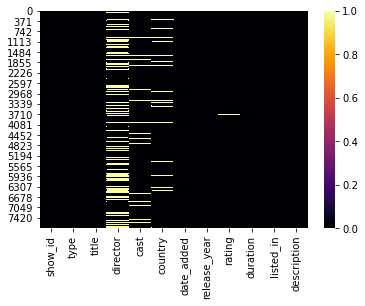

In [3]:
sns.heatmap(df.isnull(), cmap = 'inferno')

In [4]:
df.dropna(subset=['date_added'],axis = 0, inplace = True)
df[df['rating'].isnull()]
replace_rating = {67: 'TV-14', 2359: 'TV-14', 3660: 'PG-13', 3736: 'TV-14', 3737: 'TV-14', 3738: 'TV-14', 4323: 'TV-14'}
for i, rating in replace_rating.items():
    df.loc[i, 'rating'] = rating

In [5]:
df.nunique()/df.shape[0]*100

show_id         100.000000
type              0.025717
title           100.000000
director         52.063778
cast             87.707342
country           8.756590
date_added       20.123441
release_year      0.938665
rating            0.180018
duration          2.777421
listed_in         6.313488
description      99.768548
dtype: float64

In [6]:
#Adding values to missing elements for country
df['country'] = df['country'].fillna('United States')
df['fist_country_in_agg'] = df['country'].apply(lambda x: x.split(",")[0]) #when there are multiple countries in a cell

#Adding an column for season_count
df['season_count'] = df['duration'].apply(lambda x : x.split(" ")[0] if "Season" in x else "")
df['season_count']


0       4
1        
2        
3        
4        
       ..
7782     
7783     
7784     
7785    1
7786     
Name: season_count, Length: 7777, dtype: object

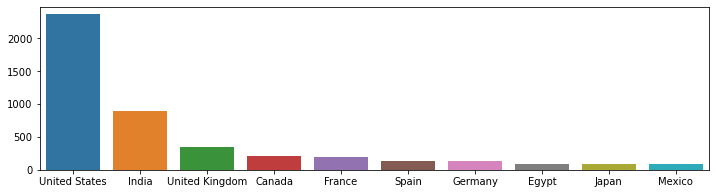

In [7]:
#  Top10 Countries Based on the Movie Count
from collections import Counter

import matplotlib.pyplot as plt
country_movies = df[df.type=="Movie"].country.value_counts()

#Creating a series for a multiple countries 
multiple_labels = country_movies[country_movies.index.str.contains(",")]
multiple_labels = multiple_labels.index.str.split(", ")

#Creating an array separating group values into a single row
a=[]
for i in range(len(multiple_labels)):
    for j in range(len(multiple_labels[i])):
        a.append(multiple_labels[i][j])

a = country_movies.append(pd.Series(Counter(a)))
b = a.groupby(by= a.index).sum()
country_movies_df = b[~b.index.str.contains(",")]

country_movies_df = country_movies_df.sort_values(ascending = False)[0:10]
plt.figure(figsize=(12, 3))
top10country = country_movies_df.sort_values(ascending = False)[0:10]
sns.barplot(x = top10country.index, y= top10country.values)
plt.show()


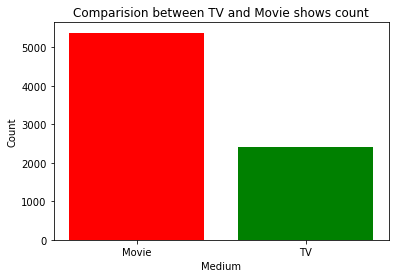

In [8]:
movie = df[df['type']== 'Movie']['type'].count()
TV = df[df['type']== 'TV Show']['type'].count()
plt.bar(['Movie', 'TV'], height=[movie, TV], color=['red','green'], visible = True)
plt.title('Comparision between TV and Movie shows count')
plt.xlabel('Medium')
plt.ylabel('Count')
plt.show()

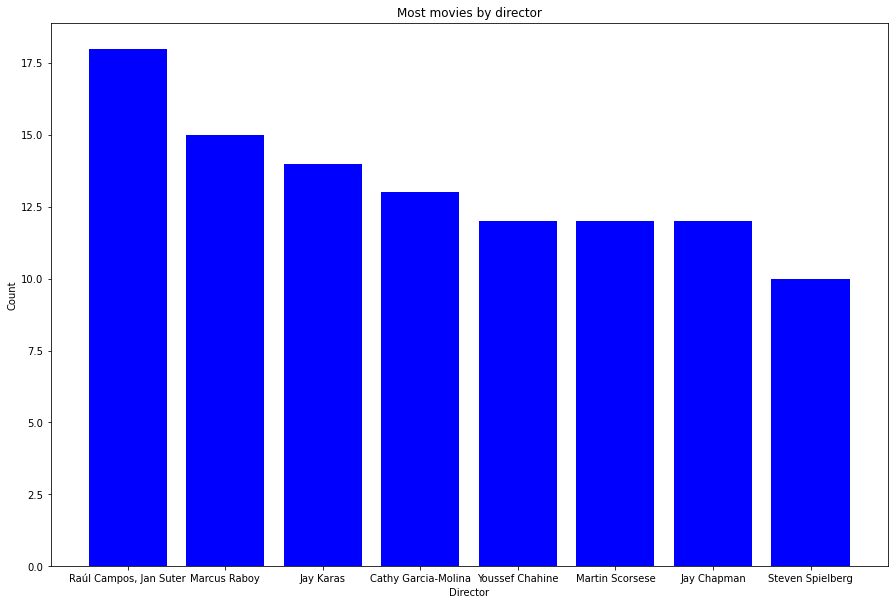

In [9]:
df_movie = df[df.type=='Movie']
df_movie_graph = df_movie.groupby('director', as_index= False).count()[['director','show_id']].sort_values(by='show_id', ascending=False)[:8]
plt.figure(figsize=(15,10))
plt.bar(df_movie_graph['director'], df_movie_graph['show_id'], color=['blue'], visible = True)
plt.title('Most movies by director')
plt.xlabel('Director')
plt.ylabel('Count')
plt.show()

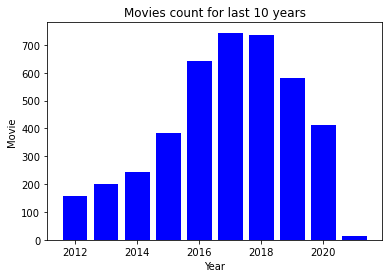

In [10]:
df_movie_graph = df_movie.groupby('release_year', as_index= False).count()[['release_year','show_id']].sort_values(by='release_year', ascending=False)[:10]
plt.bar(df_movie_graph['release_year'], df_movie_graph['show_id'], color=['blue'], visible = True)
plt.title('Movies count for last 10 years')
plt.xlabel('Year')
plt.ylabel('Movie')
plt.show()

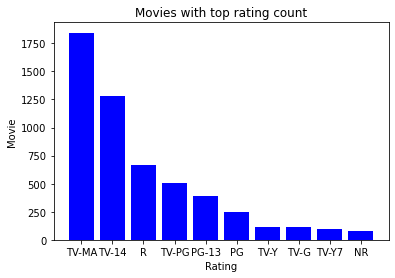

In [11]:
df_movie_graph = df_movie.groupby('rating', as_index= False).count()[['rating','show_id']].sort_values(by='show_id', ascending=False)[:10]
plt.bar(df_movie_graph['rating'], df_movie_graph['show_id'], color=['blue'], visible = True)
plt.title('Movies with top rating count')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.show()